<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/code/aula08a_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2023-05-17 14:33:19.281154: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
train_images.shape, len(train_labels), train_labels

((60000, 28, 28), 60000, array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

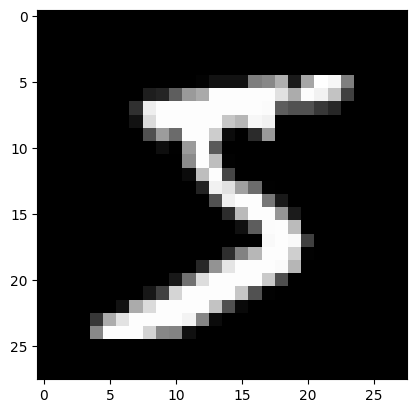

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.show()

In [4]:
test_images.shape, len(test_labels), test_labels

((10000, 28, 28), 10000, array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [5]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2023-05-17 14:33:24.965948: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-05-17 14:33:24.966560: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-05-17 14:33:24.983085: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 14:33:24.983440: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA TITAN V computeCapability: 7.0
coreClock: 1.455GHz coreCount: 80 deviceMemorySize: 11.78GiB deviceMemoryBandwidth: 607.97GiB/s
2023-05-17 14:33:24.983463: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-05-17 14:33:25.060073: I tensorflow/stream_executor/platform/default/ds

In [6]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [8]:
(train_images.shape, train_labels), (test_images.shape, test_labels)

(((60000, 784), array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)),
 ((10000, 784), array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)))

In [9]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

2023-05-17 14:33:28.144526: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-05-17 14:33:28.155135: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Epoch 1/5


2023-05-17 14:33:28.553365: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


469/469 [==============================] - 2s 2ms/step - loss: 0.4286 - accuracy: 0.8743
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1126 - accuracy: 0.9659
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9801
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0491 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0381 - accuracy: 0.9887


In [10]:
predicted = model.predict(test_images[0:1])
predicted[0]

array([2.2564863e-09, 1.1874660e-10, 8.4084064e-07, 2.4067524e-05,
       9.6391157e-13, 7.7705700e-08, 7.2817579e-14, 9.9997449e-01,
       6.2201115e-09, 4.2997533e-07], dtype=float32)

In [11]:
predicted[0].argmax()

7

In [12]:
predicted[0][7]

0.9999745

In [13]:
test_labels[0]

7

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0645 - accuracy: 0.9796
test_acc: 0.9796000123023987


In [15]:
from tensorflow.keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [16]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
  def fit(self, X, y):
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(y.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size)
    return self
  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    return np.array([(a == np.max(a)) for a in probabilities])

modelo = RedeNeural()
modelo.fit(train_images, train_labels_hot)
ypred = modelo.predict(test_images)
accuracy_score(test_labels_hot, ypred)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.8794
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1091 - accuracy: 0.9681
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0711 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9886


0.9777

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

modelo = RedeNeural()
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4300 - accuracy: 0.8773
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.9671
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0704 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0509 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 1s 1ms/step - loss: 0.0380 - accuracy: 0.9886


0.9794

In [18]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [19]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

modelo = Pipeline([
    ("scaler", MinMaxScaler()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4231 - accuracy: 0.8760
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1142 - accuracy: 0.9663
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9859
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0362 - accuracy: 0.9884


0.9804

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.astype("float32") / 255

from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4267 - accuracy: 0.8746
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1143 - accuracy: 0.9661
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9852
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0375 - accuracy: 0.9887


0.9801

In [22]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [23]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(train_images, train_labels)
ypred = modelo.predict(test_images)
accuracy_score(test_labels, ypred)

Epoch 1/5


2023-05-17 14:33:54.449167: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


469/469 [==============================] - 4s 3ms/step - loss: 0.4012 - accuracy: 0.8759
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9770
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0394 - accuracy: 0.9880
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0249 - accuracy: 0.9924
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9947


0.9839

In [24]:
!wget https://github.com/fboldt/aulasann/raw/main/mnist.zip
!rm -rf mnist
!mkdir mnist
!unzip mnist.zip -d mnist
!rm mnist.zip

--2023-05-17 14:34:03--  https://github.com/fboldt/aulasann/raw/main/mnist.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fboldt/aulasann/main/mnist.zip [following]
--2023-05-17 14:34:03--  https://raw.githubusercontent.com/fboldt/aulasann/main/mnist.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23112702 (22M) [application/zip]
Saving to: ‘mnist.zip’

mnist.zip           100%[===================>]  22,04M  1,13MB/s    in 20s     

2023-05-17 14:34:25 (1,09 MB/s) - ‘mnist.zip’ saved [23112702/23112702]

Archive:  mnist.zip
  inflating: mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ub

In [25]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)

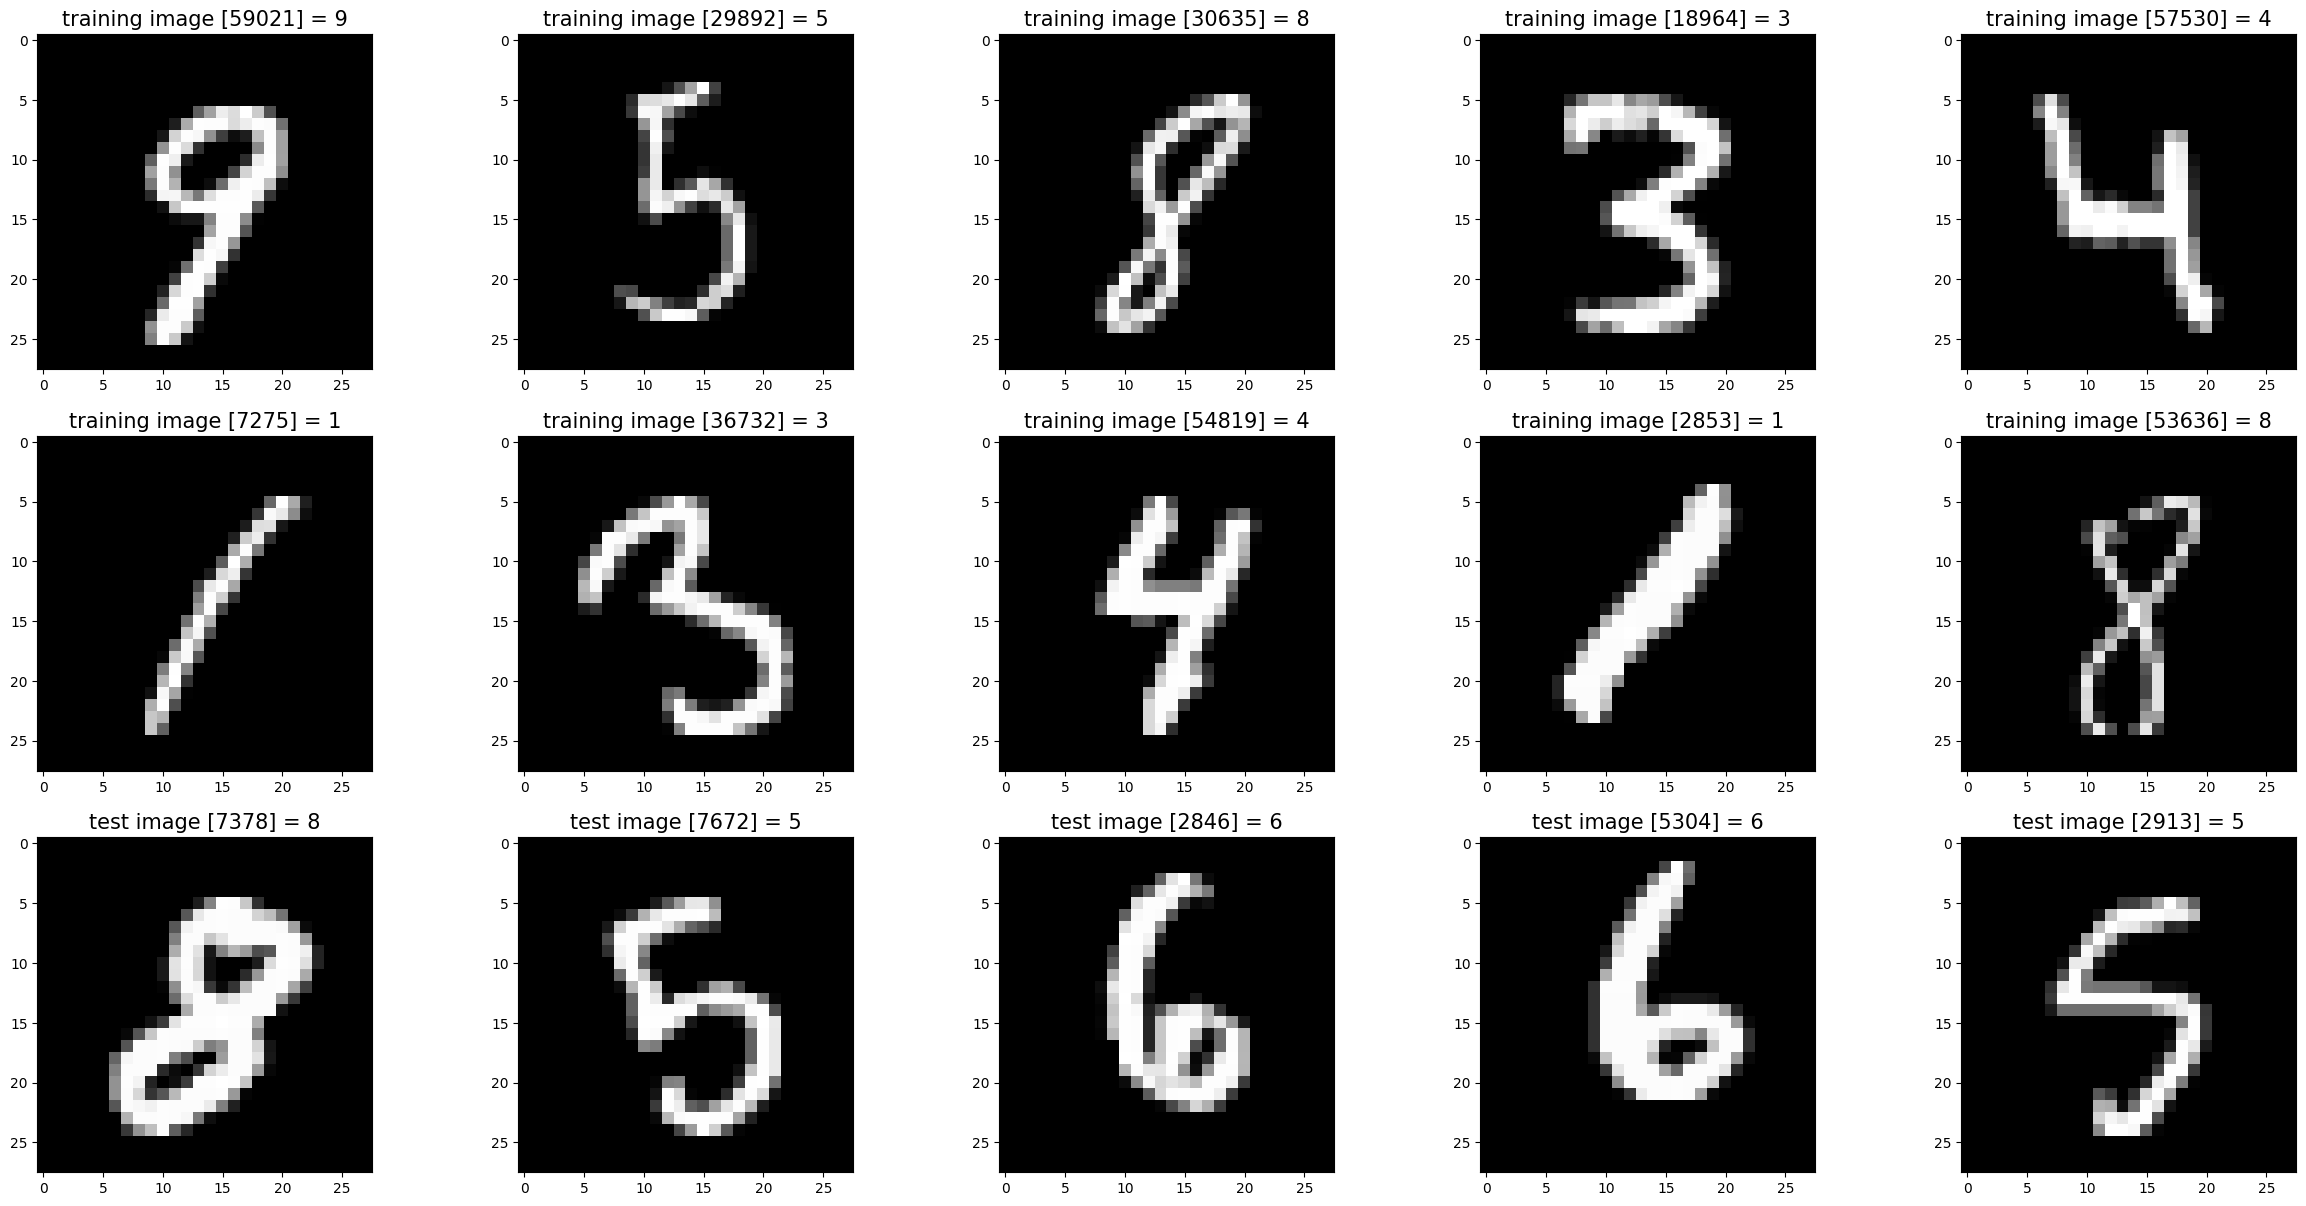

In [26]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'mnist'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [27]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    self.model = keras.Sequential([
        layers.Conv2D(4, 4, activation='relu'),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(yhot.shape[1], activation="softmax")
    ])
    self.model.compile(optimizer="rmsprop",
                       loss="categorical_crossentropy",
                       metrics=["accuracy"])
    self.model.fit(X, yhot, epochs=self.epochs, batch_size=self.batch_size)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return np.array(X, dtype="float32") / 255

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(x_train, y_train)
ypred = modelo.predict(x_test)
accuracy_score(np.array(y_test), ypred)

Epoch 1/5
469/469 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8728
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0664 - accuracy: 0.9799
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0360 - accuracy: 0.9896
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0132 - accuracy: 0.9964


0.9833

In [28]:
!rm -rf mnist

In [30]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
import numpy as np

def define_architecture(input_shape, output_shape):
    inputs = keras.Input(shape=input_shape)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(output_shape, activation="softmax")(x)
    return keras.Model(inputs=inputs, outputs=outputs)

class RedeNeural(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128):
    self.epochs = epochs
    self.batch_size = batch_size
    self.validation_split=0.2

  def to_categorical(self ,y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids)
    return yhot

  def fit(self, X, y):
    yhot = self.to_categorical(y)
    self.model = define_architecture(X.shape[1:], yhot.shape[1])
    self.model.compile(optimizer="rmsprop", 
                  loss="categorical_crossentropy", 
                  metrics=["accuracy"])
    self.model.fit(X, yhot, 
                   epochs=self.epochs, 
                   batch_size=self.batch_size,
                   validation_split=self.validation_split)
    return self

  def predict(self, X, y=None):
    probabilities = self.model.predict(X)
    ypred = self.labels[np.argmax(probabilities, axis=1)]
    return ypred

class DividePor255(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return np.array(X, dtype="float32") / 255

class MudaShape(BaseEstimator, TransformerMixin):
  def fit(self, X, y):
    return self
  def transform(self, X, y=None):
    return X.reshape((-1,28,28,1))

modelo = Pipeline([
    ("scaler", DividePor255()), 
    ("reshape", MudaShape()), 
    ("ann", RedeNeural())
])
modelo.fit(x_train, y_train)
ypred = modelo.predict(x_test)
accuracy_score(np.array(y_test), ypred)

Epoch 1/5
375/375 [==============================] - 2s 4ms/step - loss: 0.5165 - accuracy: 0.8378 - val_loss: 0.0727 - val_accuracy: 0.9784
Epoch 2/5
375/375 [==============================] - 1s 4ms/step - loss: 0.0683 - accuracy: 0.9779 - val_loss: 0.0520 - val_accuracy: 0.9861
Epoch 3/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9874 - val_loss: 0.0482 - val_accuracy: 0.9854
Epoch 4/5
375/375 [==============================] - 2s 4ms/step - loss: 0.0299 - accuracy: 0.9904 - val_loss: 0.0404 - val_accuracy: 0.9893
Epoch 5/5
375/375 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9929 - val_loss: 0.0371 - val_accuracy: 0.9902


0.9917